# Import libraries
U know... just importing required libraries.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import csv

# Setup the csv path of a dataset
Please cheak the csv sample form from 'Dataset/csv/wiki_dataset.csv' to avoid unexpected results OuOb.

In [2]:
path = '../../Results/YearCLIPv1.csv'
df = pd.read_csv(path)

# Show the comparison
Scatter the points (prediction , ground-truth) and draw a ideal red line.

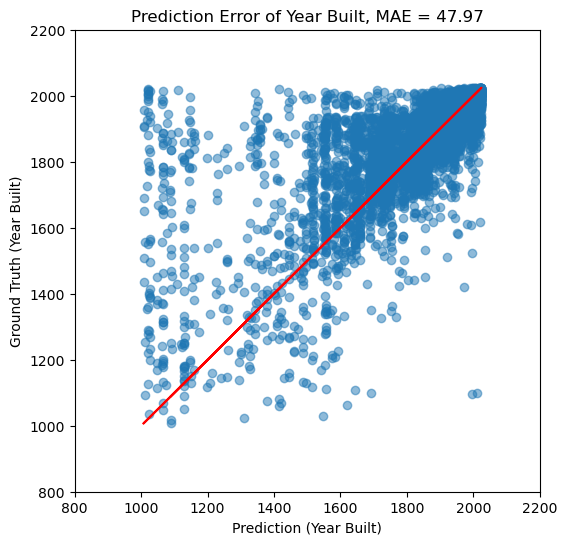

In [3]:
pred = df['pred'].to_numpy()
gt = df['year'].to_numpy()

plt.figure(figsize=(6,6))
plt.scatter(pred, gt, alpha=0.5)
plt.plot(pred, pred, color='red')

plt.xlim(800, 2200)
plt.ylim(800, 2200)

plt.title(f"Prediction Error of Year Built, MAE = {np.mean(np.abs(pred-gt)):.2f}")
plt.xlabel('Prediction (Year Built)')
plt.ylabel('Ground Truth (Year Built)')

plt.show()

# Show the difference
Plot a histogram to visualize the difference between prediction and ground-truth.

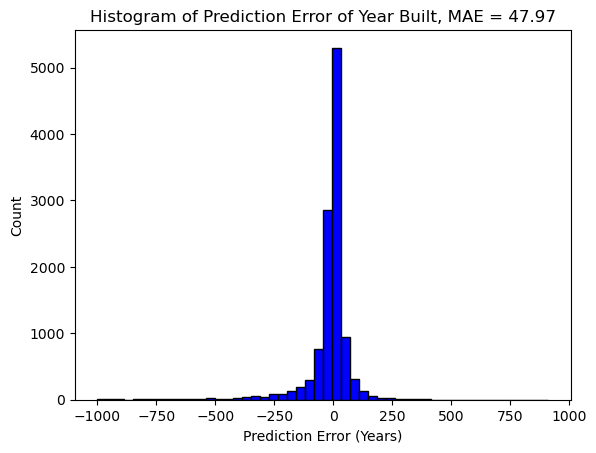

In [4]:
errors = df['diff'].to_numpy()

plt.hist(errors, bins=50, color='blue', edgecolor='black')

plt.title(f"Histogram of Prediction Error of Year Built, MAE = {np.mean(np.abs(errors)):.2f}")
plt.xlabel('Prediction Error (Years)')
plt.ylabel('Count')

plt.show()

# TOP100 worst prediction
Display top100 prediction that miss the most

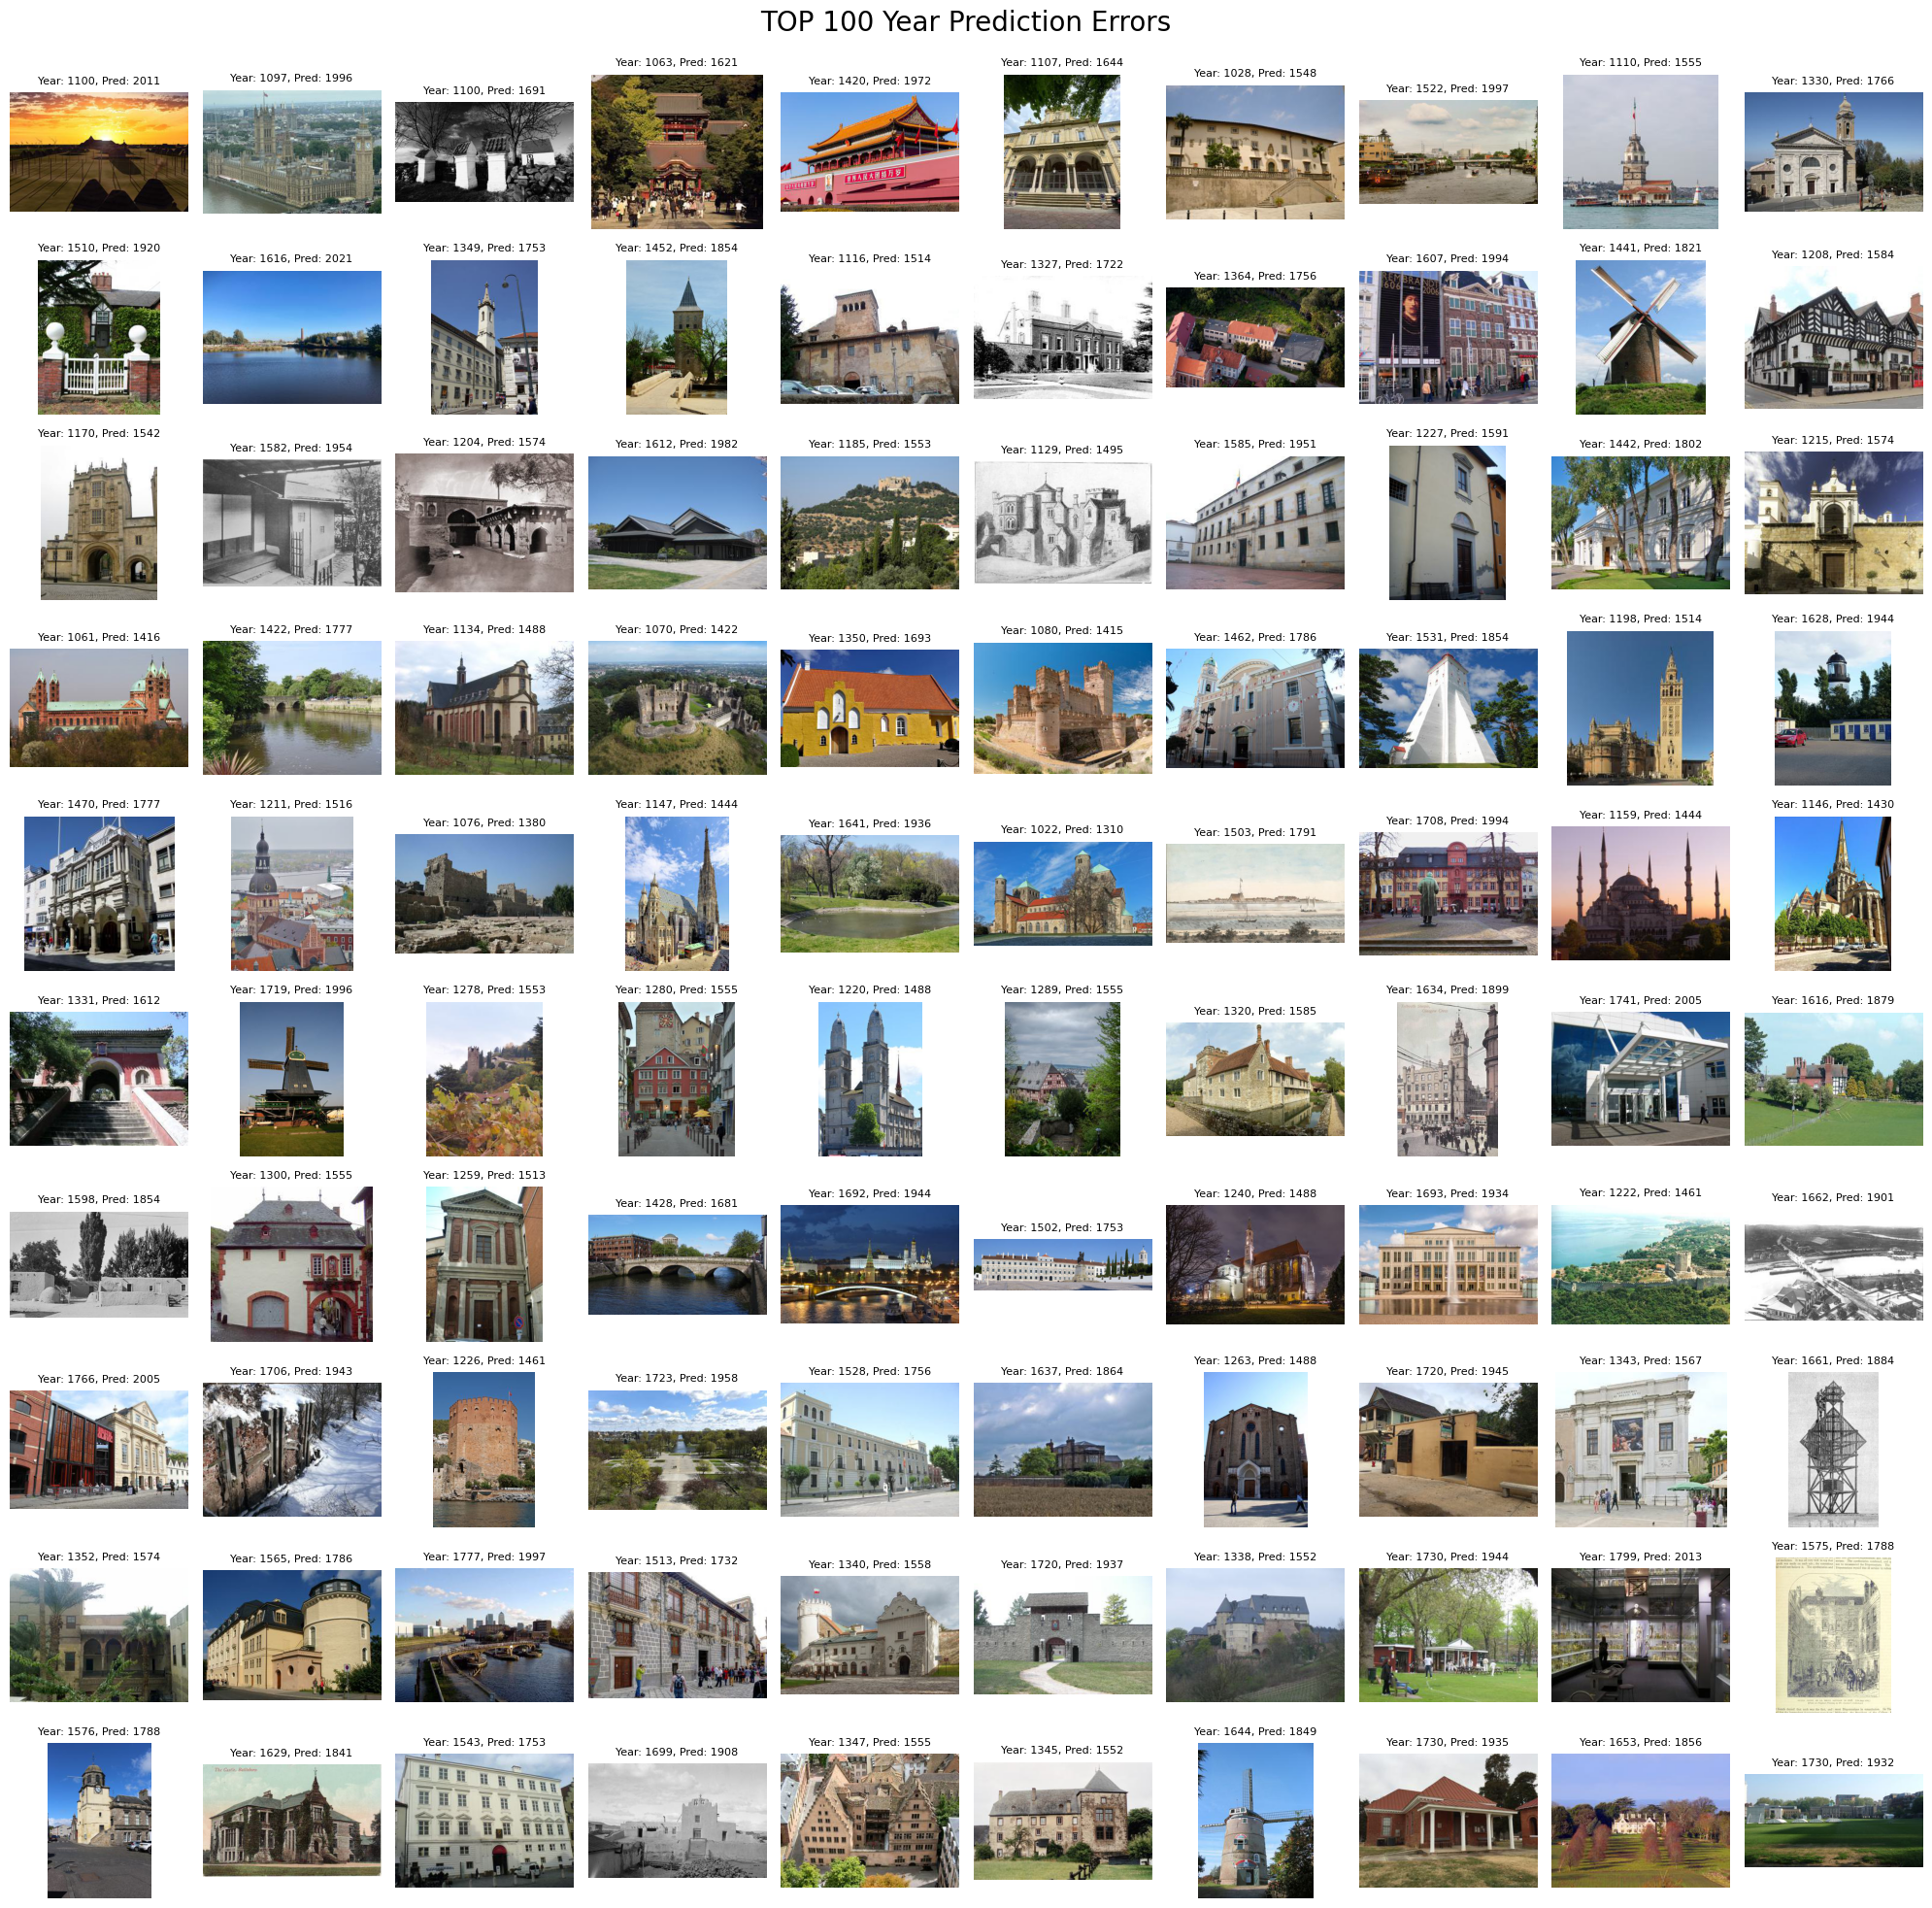

In [5]:
top_100_df = df.nlargest(100, 'diff')
img_folder = '../../Dataset/images/'

fig, axes = plt.subplots(10, 10, figsize=(20, 20))
fig.suptitle("TOP 100 Year Prediction Errors\n", fontsize=20)

for idx, (index, row) in enumerate(top_100_df.iterrows()):
    ax = axes[idx // 10, idx % 10]
    img = mpimg.imread(img_folder + row['name'])
    ax.imshow(img)
    ax.set_title(f"Year: {row['year']}, Pred: {row['pred']}", fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()